In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.linear_model import ElasticNet
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap
from scipy.special import expit

In [3]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodka.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
x = df.drop(columns=['quality'])
y = df['quality']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('en',ElasticNet(random_state=42, max_iter=100))
])

In [8]:
param_grid = {
    'en__alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
    'en__l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],
    'en__fit_intercept' : [True, False],
    'en__copy_X' : [True, False],
    'en__positive' : [True, False],
    'en__warm_start': [True, False],
    'en__precompute' : [True, False],
    'en__selection' : ['cyclic', 'random']
}

grid_search = GridSearchCV(pipeline,
param_grid=param_grid,
scoring='neg_mean_squared_error',
cv=5,
n_jobs=-1, verbose =1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('en',
                                        ElasticNet(max_iter=100,
                                                   random_state=42))]),
             n_jobs=-1,
             param_grid={'en__alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'en__copy_X': [True, False],
                         'en__fit_intercept': [True, False],
                         'en__l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'en__positive': [True, False],
                         'en__precompute': [True, False],
                         'en__selection': ['cyclic', 'random'],
                         'en__warm_start': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

In [ ]:
proba = expit(y_pred)
print(proba)

In [ ]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodkapredict.csv")
prediksi.head()

In [ ]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = expit(y_prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

In [10]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
p = x_test.shape[1]
r2_adj = 1 - ((1-r2) * (n - 1) / (n - p - 1))

print(mse)
print(mae)
print(rmse)
print(r2)
print(r2_adj)

0.4275007387819198
0.523785506978865
0.6538354064915113
0.34620673532103385
0.3330831478913465


In [23]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [-0.4504291  -0.5210846  -0.45189145 -0.39660996 -0.35652155]
Mean CV Accuracy: -0.43530732970078284


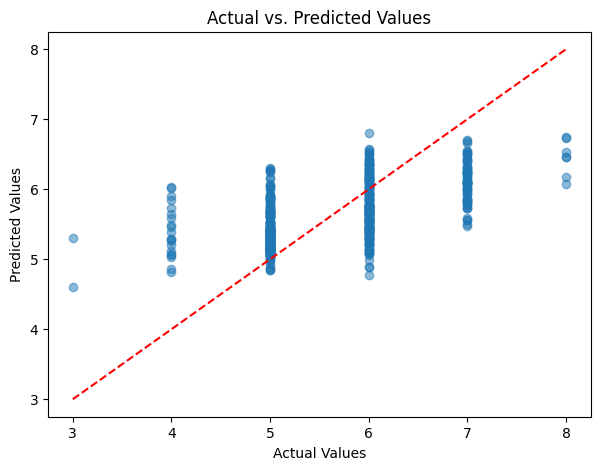

In [11]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

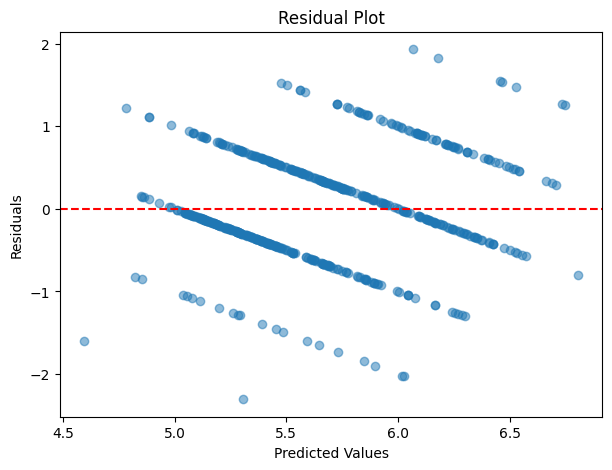

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

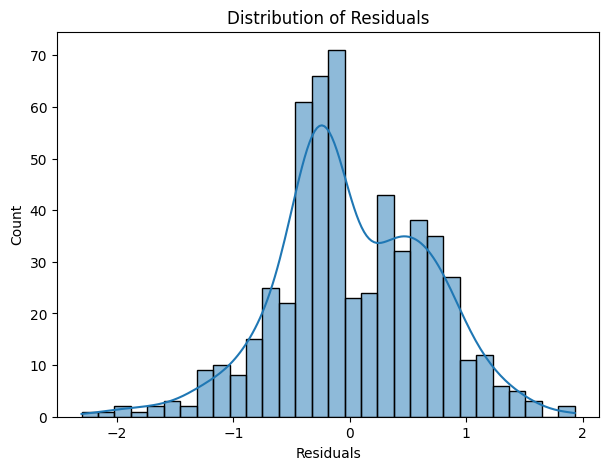

In [13]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

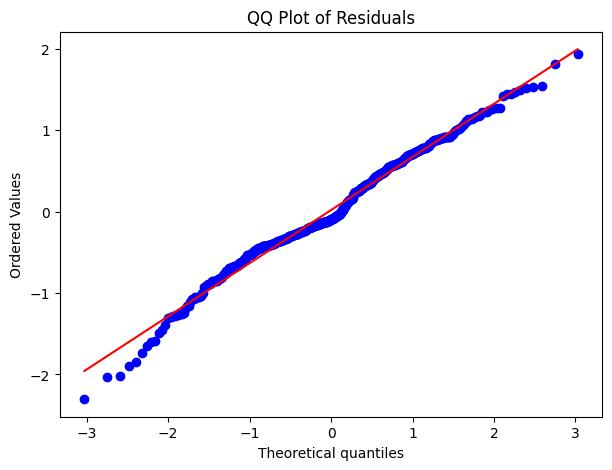

In [14]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

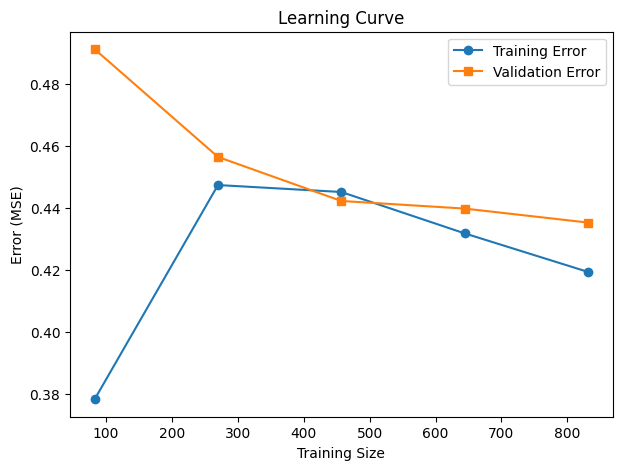

In [15]:
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()

C:\Users\Robyi\AppData\Local\Temp\ipykernel_16104\1522169952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=x.columns, orient="h", palette="viridis")


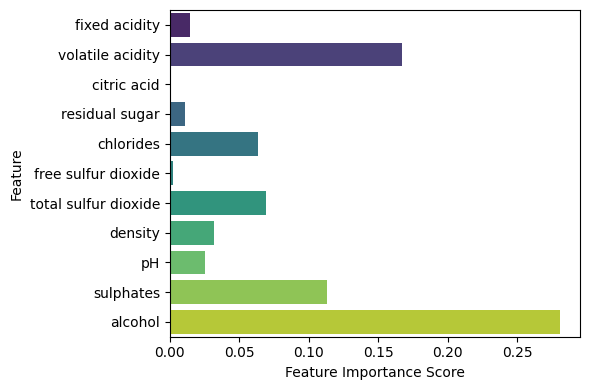

In [19]:
en = best_model.named_steps['en']
feature_importance = np.abs(en.coef_)

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=x.columns, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [20]:
explainer = shap.Explainer(en, x_train)
shap_values = explainer(x_test)

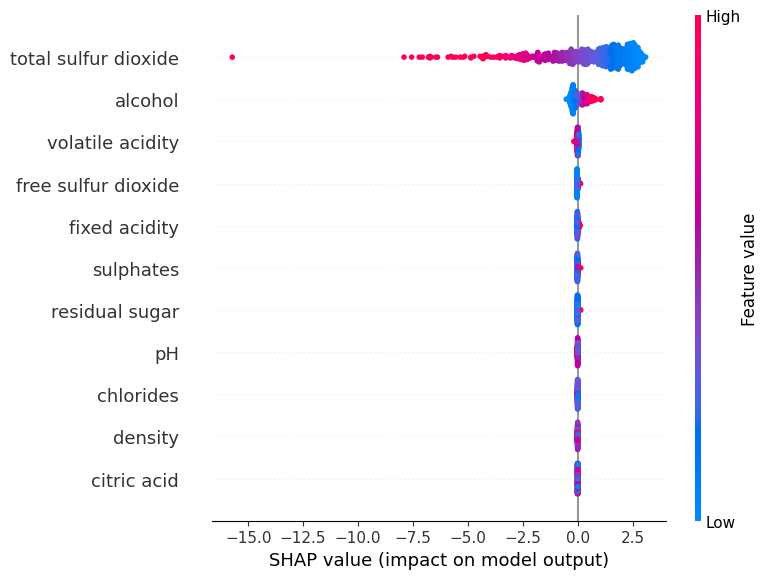

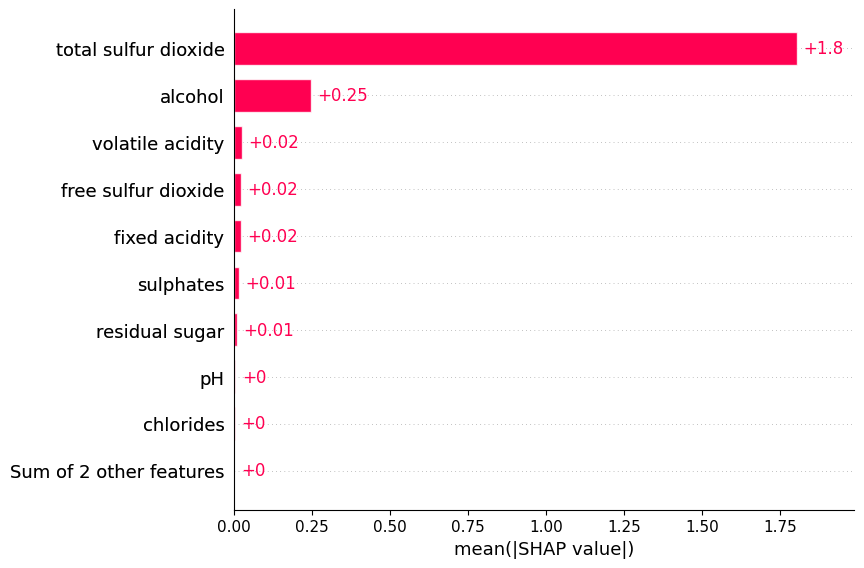

In [21]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)